# Worked Example

## Generative Art with GANs

### Project Introduction

In this exploratory project, we delve into the intersection of art and artificial intelligence, focusing on the generation of oil-painted portraits through the advanced capabilities of Generative Adversarial Networks (GANs). This innovative approach not only challenges the traditional boundaries between technology and artistry but also offers new perspectives on creativity and machine learning's potential to mimic and enhance human artistic expression.

### The Challenge

The generation of art, especially oil-painted portraits, through algorithms presents a complex challenge. Unlike conventional image processing tasks, art generation requires a deep understanding and replication of the nuances that define artistic styles, including texture, color balance, and emotional depth. Traditional machine learning approaches often fall short in capturing these subtleties, leading to outputs that lack the essence of true artistry. This project aims to overcome these limitations by harnessing the power of GANs, pushing the boundaries of what machines can create.

### Dataset Exploration

Our dataset is a curated collection of oil-painted portraits spanning various epochs, artistic movements, and styles. Each portrait is a unique expression of human creativity, making the dataset not only diverse but also rich in artistic value. Key characteristics of our dataset include:

- **Diversity in Style:** From Renaissance masterpieces to modern abstract portraits, our dataset encompasses a wide range of artistic expressions.
- **Uniformity in Dimension:** To streamline the computational process, all images are resized to 64x64 pixels. This resizing maintains a balance between preserving artistic details and ensuring efficient data processing.
- **Unlabeled Data:** The dataset is unlabeled, emphasizing the unsupervised nature of our learning task. The focus is on learning the inherent distribution of the data to generate new, authentic-looking portraits.

For this project, I am using .jpg files of images of portraits. The dataset includes various artists. I am loading data as TensorFlow.Dataset,, with a batch size of 64. I have reduced the image size to (64,64), presuming, it will be computationally less taxing on the GPU.

### Generative AI's Role in Art

The core of this project lies in the application of GANs, a type of generative AI that has shown remarkable success in generating realistic images. GANs consist of two competing networks: the Generator, which produces images, and the Discriminator, which evaluates them. The adversarial relationship between these two networks drives the Generator to produce increasingly realistic outputs. In the context of art generation, this means creating new portraits that could believably be mistaken for human-made artworks. Our exploration into GANs aims to:

- **Understand and Replicate Artistic Styles:** By training on a diverse set of portraits, we aim to capture the essence of various artistic movements and techniques.
- **Push the Limits of Creativity:** We explore how far we can push the Generator to create portraits that are not only realistic but also creatively compelling.
- **Bridge the Gap Between AI and Art:** Through this project, we seek to explore the potential of AI not just as a tool for replication but as a medium for creating new forms of art.

### Project Goals and Expectations

By the conclusion of this project, we aim to achieve the following:

1. **Successful Implementation of GANs:** To demonstrate the efficacy of GANs in generating high-quality, diverse portraits that resonate with the depth and complexity of human-made art.
2. **Artistic Insight and Analysis:** To gain insights into the learning process of GANs, including how they interpret and recreate various artistic styles.
3. **Exploration of Creativity:** To challenge and expand our understanding of creativity through the lens of artificial intelligence, exploring the nuances of what it means to create art.

This project is not just a technical exploration but also an artistic endeavor, challenging the boundaries between human and machine creativity. Through the lens of generative AI, we embark on a journey to redefine what is possible in the realm of art generation.


In [1]:
#Importing Libraries
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
import tensorflow  as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, Dropout, ZeroPadding2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
import tqdm
import warnings
from tensorflow.keras.initializers import HeNormal
warnings.filterwarnings("ignore")
#Settings
sns.set(rc={"axes.facecolor":"#EDE9DE","figure.facecolor":"#D8CA7E"})

#Importing data
data_path = "PortraitsUnzip/"
batch_s = 64
#Import as tf.Dataset
data = tf.keras.preprocessing.image_dataset_from_directory(data_path, label_mode = None, image_size = (64,64), batch_size = batch_s)

Found 4117 files.


#### Importing Libraries and Preparing the Dataset

This section of the code is dedicated to setting up the environment and preparing the dataset for our Generative Adversarial Network (GAN) model, aimed at generating oil-painted portraits:

1. **Library Imports**: Essential libraries are imported for the project, including:
   - `numpy` and `matplotlib.pyplot` for numerical operations and plotting.
   - `seaborn` for enhanced graphical representations.
   - `PIL` for image processing tasks.
   - TensorFlow and Keras for building and training the GAN models.

2. **Visualization Settings**: We customize our plots using `seaborn.set()` to make them more visually appealing, setting a theme with specific colors for the axes and figure background.

3. **Data Loading**: The dataset, comprising images of oil-painted portraits, is loaded from a specified path. Each image is resized to 64x64 pixels, and the dataset is batched into sizes of 64 for efficient training. This step uses TensorFlow's `tf.keras.preprocessing.image_dataset_from_directory` function, setting the groundwork for the model training process.

This initial setup is crucial for ensuring that our dataset is ready and optimized for the model training phase, facilitating the development of a GAN capable of generating authentic-looking oil-painted portraits.

Now that we have the dataset loaded, let us have a look at a few images.


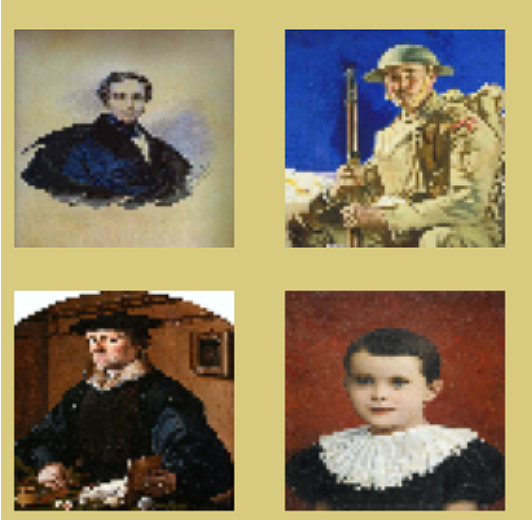

### Data Preprocessing for Portrait GAN

We're focusing on portraits, which are artistic representations of individuals, highlighting their facial features, expressions, and demeanor to encapsulate their personality. Our model, a smaller variant of a GAN, works with downscaled images to match its capacity.

#### Preprocessing Steps


To prepare our data for the model, we implement normalization. This process scales the pixel values in each of the RGB channels from a range of 0-255 to a more computationally efficient range of 0-1. This scaling is achieved simply by dividing the pixel values by 255. Such normalization aids in quicker convergence during training and streamlines calculations for the model.


### Building the Generator for GAN

In [2]:
latent_dim = 100
g_resolution=2

#Building a Generator
generator = Sequential()
generator.add(Dense(4*4*256,activation="relu",input_dim=latent_dim))
generator.add(Reshape((4,4,256)))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))#
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(128,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(Conv2D(3,kernel_size=3,padding="same"))
generator.add(Activation("tanh"))

        
generator.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 3)           │           3,459 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,486,019 (9.48 MB)

 Trainable params: 2,484,227 (9.48 MB)

 Non-trainable params: 1,792 (7.00 KB)

The generator is a key component of our Generative Adversarial Network (GAN), tasked with producing images that mimic the style of oil-painted portraits from random noise. Here's an overview of the generator's architecture and function:

1. **Initial Setup**: Utilizing Keras's `Sequential` model, we start with a dense layer to project and reshape the input latent noise into a small spatial dimension with a high depth (4x4x256).

2. **Dynamic Upsampling**: Based on the `g_resolution` parameter, we dynamically add upsampling blocks. Each block doubles the image's width and height, applies a convolution to add depth and complexity, and uses batch normalization and LeakyReLU for stability and efficiency.

3. **Final Touches**: A convolutional layer further refines the features and transitions to the output's required channel depth (3 channels for RGB images). The `tanh` activation function ensures the output values fall within the normalized range of [-1, 1], ready for comparison against real images.

This setup allows the generator to start from a compact representation of random noise and build up to a detailed and complex image that aims to fool the discriminator into classifying it as a real portrait, reflecting the intricate and varied styles found in our dataset of oil-painted portraits.

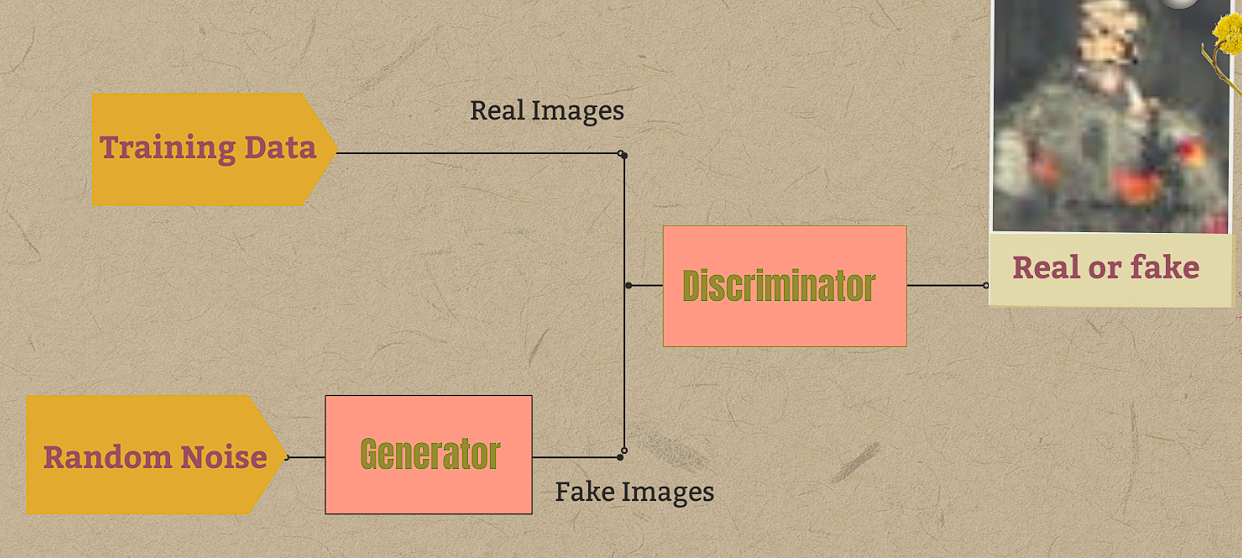

**Now that we have structured the Generator, let's take a look at the initial output from our untrained Generator to gain insight into the beginning stages of the generative process.**


(-0.5, 63.5, 63.5, -0.5)

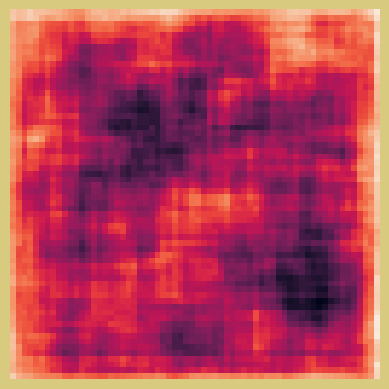

In [3]:
#Creating a random seed and output from generator
seed = tf.random.normal([1, latent_dim])
Generated_Portrait = generator(seed, training=False)
#Plotting the image output of generator without training 
plt.imshow(Generated_Portrait[0, :, :, 0])
plt.axis("off")

Clearly, the output is a random seed containing noise as the Generator is not trained yet.

### Building the discriminator for GAN

In [4]:
#Building a Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(64,64,3), padding="same"))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
discriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d (ZeroPadding2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 17, 17, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 9, 9, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 9, 9, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 9, 9, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 9, 9, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 9, 9, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,613,889 (6.16 MB)

 Trainable params: 1,611,969 (6.15 MB)

 Non-trainable params: 1,920 (7.50 KB)

The discriminator in our Generative Adversarial Network (GAN) is tasked with distinguishing real oil-painted portraits from those generated by the generator. Here's a breakdown of its construction:

1. **Architecture Setup**: The discriminator is modeled using Keras's `Sequential` API, starting with the images' `input_shape`.

2. **Initial Convolution**: Begins with a convolutional layer designed to downsample the input image while extracting foundational feature representations, using `LeakyReLU` for activation to allow a small, negative slope for negative values and dropout to mitigate overfitting.

3. **Convolutional Depth**: Introduces several convolutional layers with increasing filter counts (64 to 512), incorporating techniques such as `ZeroPadding2D` for shape alignment, `BatchNormalization` for training stability, and dropout for complexity control. This structure is crucial for learning increasingly abstract and complex features from the portraits.

4. **Final Judgment**: Concludes with a flattening layer and a dense output layer with a `sigmoid` activation, providing a binary classification of the input images as real or fake.

Through this architecture, the discriminator learns to critically evaluate portraits, improving its accuracy over time as it trains against increasingly convincing images produced by the generator. The initial test of this untrained model on a generated image produced an indecisive verdict, indicating a balanced starting point for the adversarial training process.

### GAN Compilation

In [5]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))
        # Decode them to fake images
        generated_images = self.generator(seed)
        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)
        # Assemble labels discriminating real from fake images
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))
        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Sample random points in the latent space
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(seed))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}



This section of our notebook implements the core logic of our Generative Adversarial Network (GAN) for generating oil-painted portraits. The GAN class orchestrates the adversarial training process involving two key components:

1. **Generator**: Aims to generate new images that mimic the style of real oil-painted portraits from random noise.
2. **Discriminator**: Evaluates images to distinguish between real portraits and those generated by the Generator.

### Training Process

The training occurs in two phases within each epoch:

- **Phase 1**: The Discriminator is trained to correctly label real images and fake images produced by the Generator. This phase sharpens the Discriminator's ability to discern between real and generated content.
- **Phase 2**: The Generator is trained to produce images that the Discriminator will classify as real. Here, the Generator improves its ability to create realistic images, aiming to trick the Discriminator.

### Adversarial Training

- The `train_step` method facilitates this by sampling from the latent space to create fake images, combining them with real images, and then training the Discriminator to differentiate them.
- Subsequently, the Generator is trained to deceive the Discriminator, using the feedback to adjust its weights towards generating more convincing images.

This adversarial training loop is the essence of GANs, driving both networks towards producing and identifying images that are increasingly indistinguishable from real oil-painted portraits.


## GAN Training Process

In [6]:
#Defining the number of epochs
epochs = 50   ##### Increase the epoch for better results But it takes time #########
#The optimizers for Generator and Discriminator
discriminator_opt = tf.keras.optimizers.Adamax(1.5e-4,0.5)
generator_opt = tf.keras.optimizers.Adamax(1.5e-4,0.5)
#To compute cross entropy loss
loss_fn = tf.keras.losses.BinaryCrossentropy()

#Defining GAN Model
model = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)

#Compiling GAN Model
model.compile(d_optimizer=discriminator_opt, g_optimizer=generator_opt, loss_fn=loss_fn)

#Fitting the GAN
history = model.fit(data, epochs=epochs)


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - d_loss: 0.5038 - g_loss: 0.7267
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - d_loss: 0.3103 - g_loss: 0.9633
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - d_loss: 0.1368 - g_loss: 2.0094
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - d_loss: 0.0476 - g_loss: 3.5089
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - d_loss: 0.0228 - g_loss: 4.9758
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 248s 4s/step - d_loss: -0.0059 - g_loss: 7.0509
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - d_loss: -0.0471 - g_loss: 10.6012
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - d_loss: -0.1130 - g_loss: 18.3818
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - d_loss: -0.3590 - g_loss: 38.7192
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 318s 5s/step - d_loss: -0.9502 - g_loss: 101.3451
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 316s 5s/step - d_loss: -2.7334 - g_loss: 266.3826
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 312s 5s/ste

The training process of our Generative Adversarial Network (GAN) for generating oil-painted portraits involves several key steps and configurations:

1. **Hyperparameters Setup**: We initialize training with 200 epochs, using a latent dimension of 100 for the noise vector. Both the discriminator and generator employ Adam optimizers with a learning rate of `1.5e-4` and `beta_1` set to 0.5. The binary crossentropy loss function is chosen for its effectiveness in binary classification tasks, like distinguishing between real and fake images.

2. **Custom Training Logic**: A custom `train_step` function orchestrates the training of the discriminator and generator:
   - The generator attempts to produce images from random noise.
   - The discriminator assesses both real images and those generated by the generator.
   - Losses for both models are calculated: the generator's loss reflects how well it tricks the discriminator, while the discriminator's loss reflects its ability to separate real images from fakes.

3. **Optimization**: Gradients of the loss functions are computed and applied to adjust the models' weights, aiming to improve the generator's ability to create realistic images and the discriminator's accuracy in identifying fakes.

4. **Epoch Iteration**: The training process loops over the dataset, batch by batch, for the total number of epochs specified, continually refining the models' performance.

This training regimen embodies the adversarial nature of GANs, driving the generator to produce increasingly convincing portraits and the discriminator to become more adept at identifying genuine versus generated artwork.


### EVALUATING THE MODEL


In [8]:
#Number of images to be generate
num_img=18

#A function to generate and save images
def Potrait_Generator():
    Generated_Paintings = []
    seed = tf.random.normal([num_img, latent_dim])
    generated_image = generator(seed)
    generated_image *= 255 
    generated_image = generated_image.numpy()
    for i in range(num_img):
            img = tf.keras.preprocessing.image.array_to_img(generated_image[i])
            Generated_Paintings.append(img)
            img.save("Potraits{:02d}.png".format(i)) 
    return 

#Generating images
Images = Potrait_Generator()

## Conclusion

Through the assessment of the model, it's evident that the GAN has successfully learned patterns within the portrait data. The results are promising, but for further enhancement, it would be beneficial to expand the dataset, as GANs typically require a substantial amount of data to achieve more refined results. Addressing data inconsistencies by standardizing portrait styles could also aid the GAN's learning process. Extending the training duration, with an increase in epochs, is likely to yield improvements. Moreover, continually refining the neural network architecture could contribute to building a more resilient generative model.


## References

https://machinelearningmastery.com/how-to-code-the-generative-adversarial-network-training-algorithm-and-loss-functions/

https://www.tensorflow.org/tutorials/generative/dcgan

https://karnikakapoor.blogspot.com/2021/12/ai-art.html

https://panopticon.am/what-is-generative-adversarial-networks-gan-art/

https://medium.com/analytics-vidhya/artgan-a-b77ecb1bc25a

https://www.artnews.com/list/art-in-america/features/gans-and-nfts-1234594335/

https://towardsdatascience.com/ganshare-creating-and-curating-art-with-ai-for-fun-and-profit-1b3b4dcd7376